<h1 align="center">
  <a href="https://portkey.ai">
    <img width="300" src="https://analyticsindiamag.com/wp-content/uploads/2023/08/Logo-on-white-background.png" alt="portkey">
  </a>
</h1>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pykKqel2h6ltbVok4nKHhWljcs9_PKDD?usp=sharing)

# Portkey + Nvidia NIM

[Portkey](https://app.portkey.ai/) is the Control Panel for AI apps. With it's popular AI Gateway and Observability Suite, hundreds of teams ship reliable, cost-efficient, and fast apps.

With Portkey, you can

 - Connect to 150+ models through a unified API,
 - View 40+ metrics & logs for all requests,
 - Enable semantic cache to reduce latency & costs,
 - Implement automatic retries & fallbacks for failed requests,
 - Add custom tags to requests for better tracking and analysis and more.


## Quickstart

Since Portkey is fully compatible with the OpenAI signature, you can connect to the Portkey AI Gateway through OpenAI Client.

- Set the `base_url` as `PORTKEY_GATEWAY_URL`
- Add `default_headers` to consume the headers needed by Portkey using the `createHeaders` helper method.

You will need Portkey and Nvidia API keys to run this notebook.

- Sign up for Portkey and generate your API key [here](https://app.portkey.ai/).
- Get your Nvidia NIM key [here](https://nvidia.com/dash/api_keys)


In [1]:
!pip install -qU portkey-ai openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.9/405.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00


## With OpenAI Client

In [ ]:
from openai import OpenAI
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders
from google.colab import userdata

client = OpenAI(
    api_key= userdata.get('NVIDIA_API_KEY'), ## replace it your Mistral API key
    base_url=PORTKEY_GATEWAY_URL,
    default_headers=createHeaders(
        provider = "openai",
        custom_host = "https://integrate.api.nvidia.com/v1",
        api_key= userdata.get('PORTKEY_API_KEY'), ## replace it your Portkey API key
    )
)

completion = client.chat.completions.create(
  model="google/gemma-2-27b-it",
  messages=[{"role":"user","content":"Write a limerick about the wonders of GPU computing."}],
)

print(completion.choices[0].message.content)

## Observability with Portkey

By routing requests through Portkey you can track a number of metrics like - tokens used, latency, cost, etc.

Here's a screenshot of the dashboard you get with Portkey!

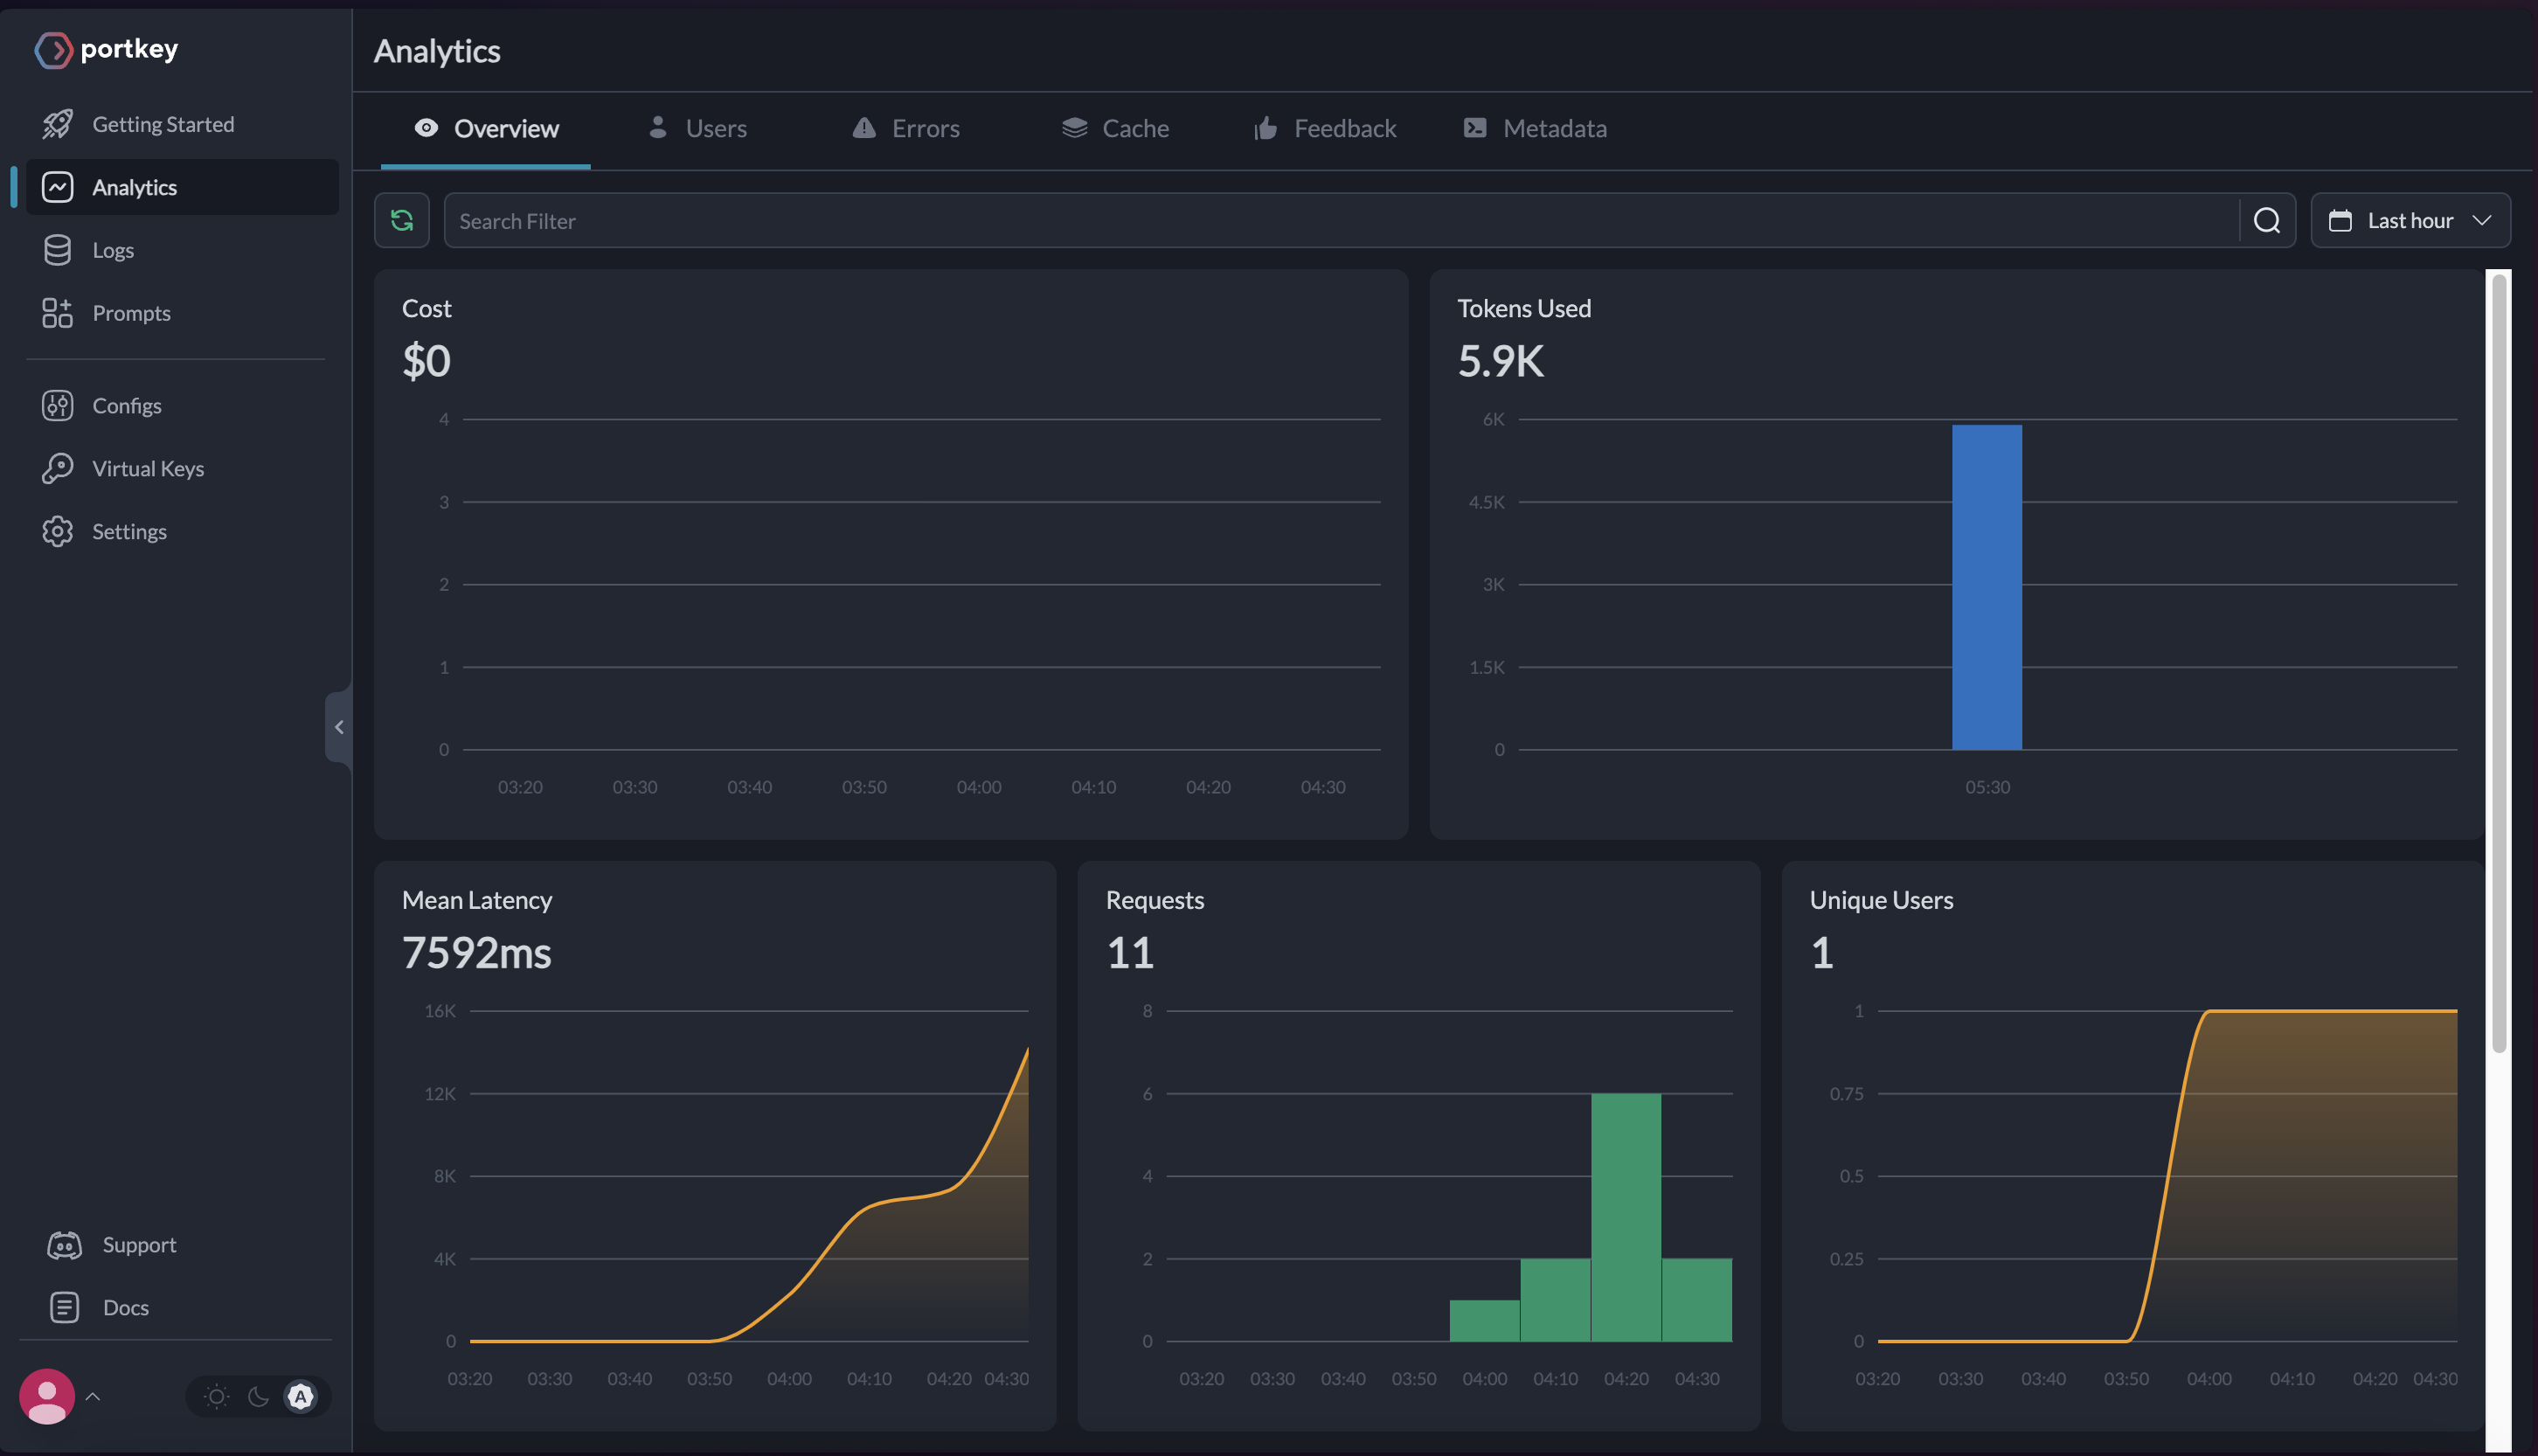
